In [1]:
from numpy import *
from pylab import *
from scipy.integrate import odeint
from itertools import *
import matplotlib.pyplot as p

%matplotlib inline

In [2]:
#------------------------------------------------------------------------
#                               PARAMETERS
#------------------------------------------------------------------------
lamda=0.3
K=3
gama=0

In [3]:
#-------------------------------------------------------------------------
#                           STEADY STATES
#-------------------------------------------------------------------------
xstar=[0,0]
#xstar=[1,0]
#xstar = [1-1/K,1/K]

In [4]:
#-------------------------------------------------------------------------
#                        VECTOR FIELD
#-------------------------------------------------------------------------
def field(X, t=0):
    c=X[0]
    n=X[1]
    
    dc= c*(1-c-gama*n)-lamda*c*(1-K*n)
    dn= lamda*c*(1-K*n)
    # here X[0] = x and x[1] = y    
    return np.array([dc,dn])


# Plot time dynamics and phase space

In [5]:
# Generate initial conditons near a steady state
#
# INPUTS
#   xstar: steady state
#   eps: variation
#   n: number of initial conditions 
def init_cond(xstar,eps,n):
    xinit = xstar + eps*rand(n,2)
    
    return xinit

In [6]:
#time array
T=150
m=500     
t=linspace(0,T,m,endpoint=True)

num_ini=2
eps   = 0.03
init_states=init_cond(xstar,eps,num_ini)

sols=[]

for xi in init_states:
    sol=odeint(field,xi,t)
    cc=sol[:,0]
    nn=sol[:,1]
    
    sols.append([cc,nn])

Text(0.5,1,'Dinámica en el tiempo')

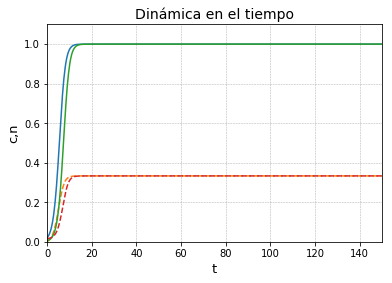

In [7]:
#plot time dynamics
fig1=figure()
xlabel("t",fontsize=13)
ylabel("c,n",fontsize=13)
xlim(0,150)
ylim(0,1.1)

#for xi in init_states :
#    sol=odeint(field,xi,t)
#    plot(t,sol[:,0])
#    plot(t,sol[:,1],'--')

for sol in sols:
    plot(t,sol[0])
    plot(t,sol[1],'--')

grid(linestyle='--',linewidth=0.5)
title('Dinámica en el tiempo',fontsize=14)
#savefig('./images/cn_vs_t.eps',format='eps',dpi=900)

Text(0.5,1,'Espacio fase')

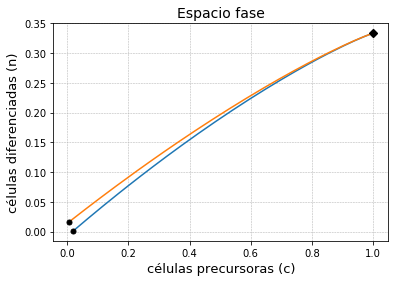

In [8]:
#plot phase space
fig2=figure()
xlabel("células precursoras (c)",fontsize=13)
ylabel("células diferenciadas (n)",fontsize=13)

for (xi,sol) in zip(init_states,sols) :
    plot(sol[0],sol[1])
    plot(xi[0],xi[1],"black",marker='o',markersize=5.0)
    plot(sol[0][-1],sol[1][-1],"black",marker='D',markersize=5.0)
    
grid(linestyle='--',linewidth=0.5)
title('Espacio fase',fontsize=14)
#savefig('./images/cn_vs_t.eps',format='eps',dpi=900)

# Quiverplot

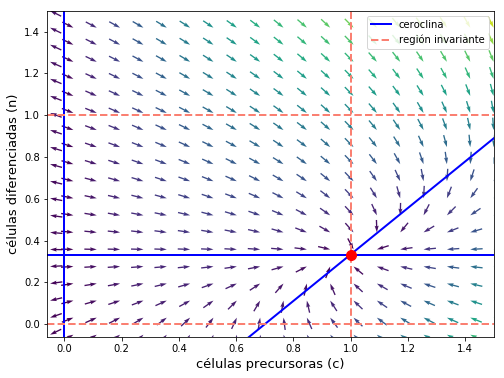

In [9]:
# time array
t2 = np.linspace(0, 20,  1000)

#plot
fig3 = plt.figure(figsize=(8,6))
ax = fig3.add_subplot(1,1,1)

#plot configurations
ax.set_xlim(-0.06,1.5)
ax.set_ylim(-0.06,1.5)
#ax.grid(linestyle='--',linewidht=0.3)
ax.set_xlabel("células precursoras (c)",fontsize=13)
ax.set_ylabel("células diferenciadas (n)",fontsize=13)

x = np.linspace(-0.1,1.5,20)
y = np.arange(-0.1,1.5,20)

#nullclines
n_c=x/(lamda*K-gama)+(lamda-1)/(lamda*K-gama)
#n_c=(lamda*K-gama)*y+(1-lamda)

# plot nullclines
ax.plot(x,n_c,color='b',linewidth=2.0,label='ceroclina')
ax.axhline(y=1/K,color='b',linewidth=2.0)
ax.plot([0,0],[-0.5,1.5],color='b',linewidth=2.0)

#plot invariant space
ax.axhline(0,color='salmon',linestyle='--',linewidth=2.0,label='región invariante')
ax.axhline(1,color='salmon',linestyle='--',linewidth=2.0)
ax.axvline(1-gama/K,color='salmon',linestyle='--',linewidth=2.0)

#plot steady states
ax.plot(1-gama/K,1/K,"red",marker='o',markersize=10.0)

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(-0.05, 1.5, 20)
y = np.linspace(-0.05, 1.5, 20)

X1 , Y1  = meshgrid(x, y)                    # create a grid
DX1, DY1 = field([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M


ax.legend(loc='best')
ax.quiver(X1, Y1, DX1, DY1,M,pivot='tip')
#savefig('./images/quiverplot.eps',format='eps',dpi=900)

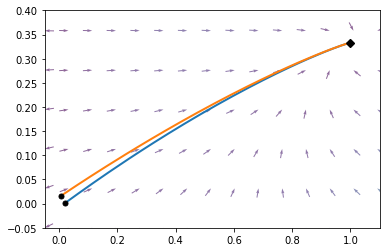

In [36]:
fig4=figure()
ax2 = fig4.add_subplot(1,1,1)

#plot config
ax2.set_ylim(-0.05,0.4)
ax2.set_xlim(-0.05,1.1)

for sol in sols:
    ax2.plot(sol[0],sol[1],linewidth=2.0)
    ax2.plot(sol[0][0],sol[1][0],"black",marker='o',markersize=5.0)
    ax2.plot(sol[0][-1],sol[1][-1],"black",marker='D',markersize=5.0)
    

#ax2.plot(x_t[0],x_t[1],linewidth=2.0)
#ax2.plot(x_t[0][0],x_t[1][0],"black",marker='o')
#ax2.plot(x_t[0][-1],x_t[1][-1],"black",marker='D')

ax2.quiver(X1, Y1, DX1, DY1,M,pivot='tip',alpha=0.6)

